<a href="https://colab.research.google.com/github/surajn581/covid19_detection/blob/master/data_augmentation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
base_path = '/content/drive/My Drive/Colab Notebooks/covid19_detection'

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import cv2
from google.colab.patches import cv2_imshow

In [20]:
tf.random.set_seed(12)

In [21]:
!ls "/content/drive/My Drive/Colab Notebooks/covid19_detection/data"

covid  healthy	noncovid


In [24]:
train_data_dir= "/content/drive/My Drive/Colab Notebooks/covid19_detection/data"

In [30]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

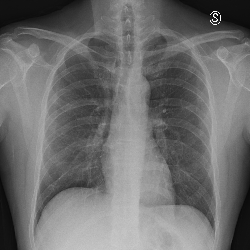

In [49]:
image = cv2.imread(base_path+'/data/covid/covid_chestxray-covid-19-pneumonia-38-pa.jpg')
image = cv2.resize(image, (250,250))
cv2_imshow(image)

In [50]:
image = tf.expand_dims(image, 0)

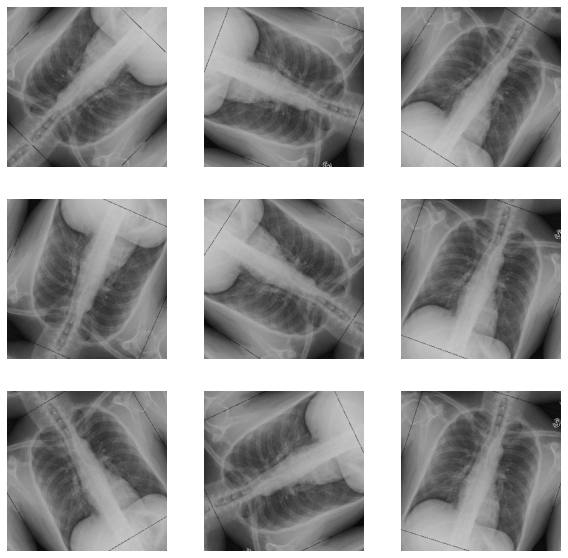

In [51]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [52]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [53]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

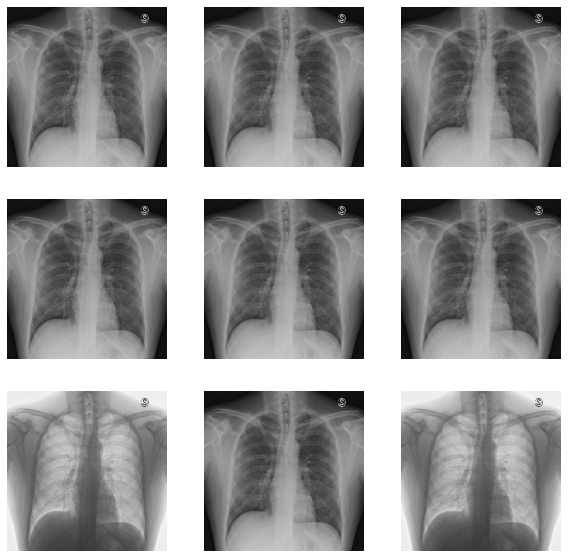

In [54]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [55]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

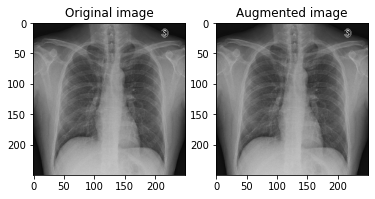

In [59]:
image = cv2.imread(base_path+'/data/covid/covid_chestxray-covid-19-pneumonia-38-pa.jpg')
image = cv2.resize(image, (250,250))
saturated = tf.image.adjust_saturation(image, 9)
visualize(image, saturated)

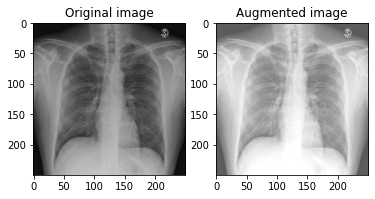

In [60]:
bright = tf.image.adjust_brightness(image, 0.3)
visualize(image, bright)

In [61]:
# Directing Images to train folder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width=64,64
batch_size=16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.3,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

# Splitting images for validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 105 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
